<a href="https://colab.research.google.com/github/wooysj/hello-world/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
y_cat_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=[x_test, y_cat_test], callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5043 - accuracy: 0.4559 - val_loss: 1.3600 - val_accuracy: 0.5152
Epoch 2/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1742 - accuracy: 0.5872 - val_loss: 1.1069 - val_accuracy: 0.6117
Epoch 3/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0342 - accuracy: 0.6357 - val_loss: 1.0989 - val_accuracy: 0.6123
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9306 - accuracy: 0.6752 - val_loss: 0.9847 - val_accuracy: 0.6573
Epoch 5/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8392 - accuracy: 0.7054 - val_loss: 0.9670 - val_accuracy: 0.6624
Epoch 6/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7631 - accuracy: 0.7319 - val_loss: 0.9963 - val_accuracy: 0.6654
Epoch 7/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6855 - accuracy: 0.7583 - val_loss: 0.9994 -

In [ ]:
losses = model.history.history

In [ ]:
losses = pd.DataFrame(losses)

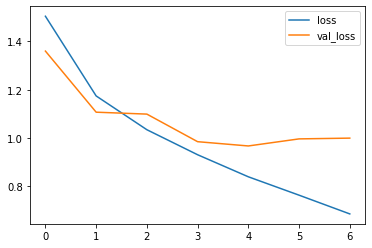

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
data = pd.read_csv('kc_house_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
import seaborn as sns

In [ ]:
data.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [ ]:
data.date = pd.to_datetime(data.date)

In [ ]:
corrs = data.corr()['price']

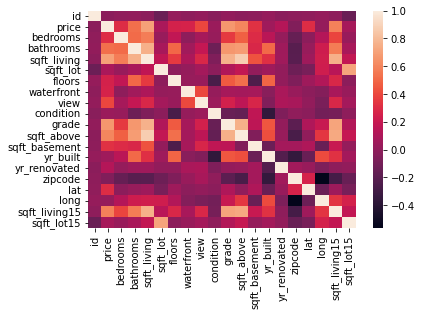

In [ ]:
sns.heatmap(data.corr())

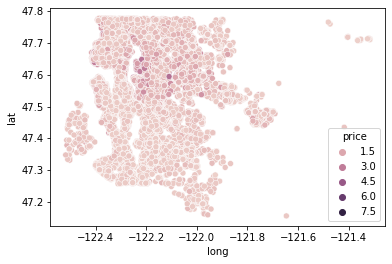

In [ ]:
sns.scatterplot(x='long', y='lat', data=data, hue='price')

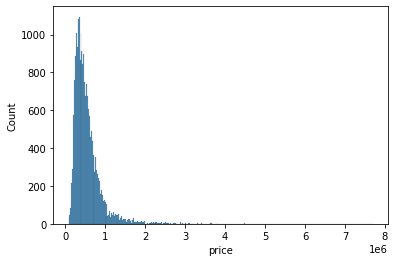

In [ ]:
sns.histplot(x='price', data=data)

In [ ]:
tenth = data.price.quantile(0.1)
nine = data.price.quantile(0.9)

tenth, nine

(245000.0, 887000.0)

In [ ]:
data_clean = data.drop(['zipcode', 'id'], axis=1)

In [ ]:
corrs[corrs > 0.5]

price            1.000000
bathrooms        0.525906
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
Name: price, dtype: float64

In [ ]:
data_clean.shape

(21597, 19)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data_clean.drop(['price','date'], axis=1).values
y = data_clean.price.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model_1 = Sequential()

model_1.add(Dense(19, activation='relu'))
model_1.add(Dense(19, activation='relu'))
model_1.add(Dense(19, activation='relu'))
model_1.add(Dense(19, activation='relu'))
model_1.add(Dense(19, activation='relu'))

model_1.add(Dense(1))

model_1.compile(loss='mse', optimizer='adam')

In [ ]:
model_1.fit(x=X_train, y=y_train, validation_data = (X_test, y_test), epochs=200)

Epoch 1/200
507/507 [==============================] - 3s 4ms/step - loss: 271235792896.0000 - val_loss: 92190957568.0000
Epoch 2/200
507/507 [==============================] - 1s 3ms/step - loss: 77502103552.0000 - val_loss: 80846356480.0000
Epoch 3/200
507/507 [==============================] - 1s 3ms/step - loss: 72953839616.0000 - val_loss: 76433055744.0000
Epoch 4/200
507/507 [==============================] - 1s 2ms/step - loss: 69572001792.0000 - val_loss: 72744968192.0000
Epoch 5/200
507/507 [==============================] - 1s 3ms/step - loss: 67118010368.0000 - val_loss: 69501558784.0000
Epoch 6/200
507/507 [==============================] - 1s 2ms/step - loss: 65553649664.0000 - val_loss: 68891303936.0000
Epoch 7/200
507/507 [==============================] - 1s 2ms/step - loss: 65326223360.0000 - val_loss: 68135792640.0000
Epoch 8/200
507/507 [==============================] - 1s 3ms/step - loss: 65122627584.0000 - val_loss: 67836760064.0000
Epoch 9/200
507/507 [==========

In [ ]:
X_train.shape

(16197, 17)

In [ ]:
data_clean.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


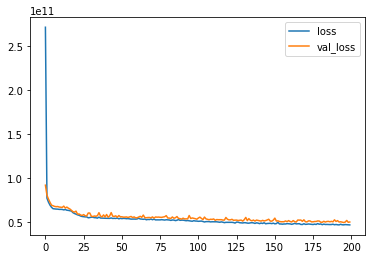

In [ ]:
losses = model_1.history.history
losses = pd.DataFrame(losses)
losses.plot()

In [ ]:
y_pred = model_1.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score

In [ ]:
r2_score(y_test, y_pred)

0.6477049116841508

In [ ]:
explained_variance_score(y_test, y_pred)

0.6484423926747969

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
single_house = data_clean.drop(['price','date'], axis=1).iloc[0]

In [ ]:
single_house.values.reshape(-1,17)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03]])

In [ ]:
model_1.predict(single_house.values.reshape(-1,17))

array([[360119.97]], dtype=float32)

In [ ]:
data.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


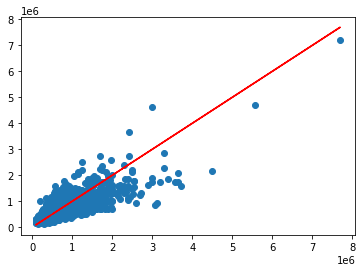

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,'r-')


In [126]:
data['area'] = data['sqft_living'] + data['sqft_lot']

In [127]:
data['price_psf'] = data['price'] / data['area']

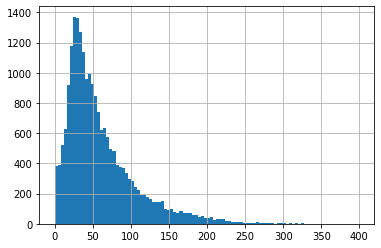

In [129]:
data['price_psf'].hist(bins=100)